# House Data Analysis - Fortaleza/CE Brazil

## 1. Importing packages

In [12]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
import matplotlib.pyplot as plt

## 2. Loading the data from CSV File

### 2.1 Loading the data using pandas and creating a DataFrame

In [2]:
df_Properties = pd.read_csv("./Resources/data_cleanned.csv")

In [3]:
words = " ".join(df_Properties['Description'])

In [4]:
words = words.lower().replace('código do anúncio','')

In [5]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('portuguese'))
    stop_words.add('sendo')
    stop_words.add('agende')
    stop_words.add('visita')
    stop_words.add('localizado')
    stop_words.add('bairro')
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [10]:
words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])
image_mask = np.array(Image.open("./Resources/house_mask.jpg"))
wc= WordCloud(background_color="white",mask=image_mask, random_state=1,stopwords=STOPWORDS, max_words = 1000, width =1000, height = 1000,max_font_size=200, min_font_size=1).generate(text)

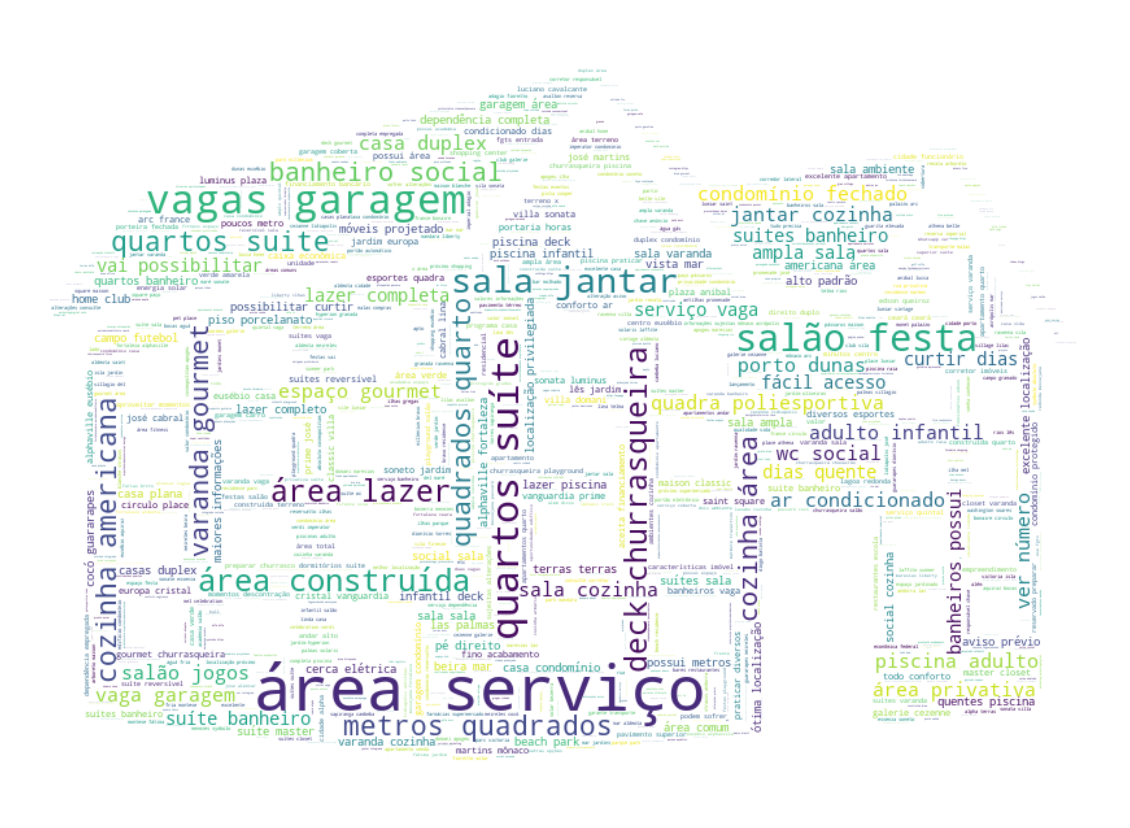

In [13]:
plt.figure(figsize=[20,20])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
wc.to_file("./Resources/house_description_wordcloud.png")